In [1]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('..\dataset\water_potability_final.csv')
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000
mean,7.142564,182.305888,19085.265711,6.475543,306.696799,397.521368,12.752898,62.840342,3.774443,0.480744
std,1.488725,47.060417,10898.661284,2.294985,83.006789,114.006936,5.202446,19.680752,1.018169,0.499737
min,0.227499,60.078393,50.478037,0.049803,2.559309,4.382786,0.000678,0.087850,0.001108,0.000000
25%,6.261001,160.941493,12879.145657,5.527460,291.443371,341.481226,10.782321,52.578156,3.262558,0.000000
50%,7.148470,191.708414,19393.469862,6.835951,324.851659,406.116784,13.724087,64.808546,3.884891,0.000000
75%,8.037993,213.023551,26134.262692,7.931077,354.498708,473.322024,16.231486,75.924225,4.455404,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [3]:
# Conditions for attribute levels

def ph(x):
    if x<6.5:
        return 0
    elif x<=8.5 and x>=6.5:
        return 1
    else:
        return 2

def hard(x):
    if x<60:
        return 0
    elif x<=120 and x>=60:
        return 1
    else:
        return 2

def tds(x):
    if x<50:
        return 0
    elif x<=150 and x>=50:
        return 1
    else:
        return 2

def chlr(x):
    if x<=4:
        return 0
    else:
        return 1

def slft(x):
    if x<250:
        return 0
    else:
        return 1

def cdty(x):
    if x<=400:
        return 0
    else:
        return 1

def crbn(x):
    if x<4:
        return 0
    else:
        return 1

def thts(x):
    if x<=80:
        return 0
    else:
        return 1

def tbty(x):
    if x<5:
        return 0
    else:
        return 1

In [4]:
X = dataset.drop(['Potability'], axis=1)
y = dataset['Potability']
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,5.057271,155.487725,19003.963899,6.250893,305.849797,518.101816,15.772438,97.199077,4.432271
1,5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954
2,6.810467,209.735559,32602.340084,7.422781,341.174269,340.030089,16.736749,42.349461,4.402340
3,4.296247,278.147524,19672.487213,4.955218,414.636726,330.067379,11.293187,70.665540,4.163329
4,9.058628,155.357557,15737.468938,7.251979,343.233977,463.389256,17.854470,83.175189,3.652134
...,...,...,...,...,...,...,...,...,...
2306,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
2307,8.249551,230.932832,32898.749368,7.019971,280.674984,364.931128,17.051185,69.781641,4.284831
2308,3.623166,156.898917,26738.525361,5.023143,388.752253,388.752620,17.196012,63.564870,5.370206
2309,8.951652,205.892346,15189.327822,3.016033,283.867695,406.309187,19.125825,65.639328,1.844372


In [5]:

cond = [ph,hard,tds, chlr, slft, cdty, crbn, thts, tbty]
col = X.columns.values
data = pd.DataFrame(columns=col)

for i in range(len(col)):
    data[col[i]] = dataset[col[i]].apply(cond[i])
X = data
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,2,2,1,1,1,1,1,0
1,0,2,2,1,1,1,1,0,0
2,1,2,2,1,1,0,1,0,0
3,0,2,2,1,1,0,1,0,0
4,2,2,2,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
2306,0,2,2,1,1,1,1,0,0
2307,1,2,2,1,1,0,1,0,0
2308,0,2,2,1,1,0,1,0,1
2309,2,2,2,0,1,1,1,0,0


0.6916

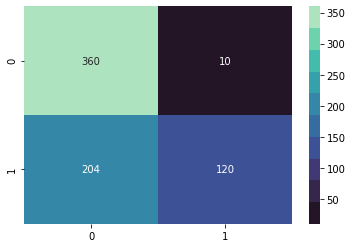

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.30, random_state= 41)
NB = GaussianNB()
NB.fit(X_train.values, y_train.values)
y_pred = NB.predict(X_valid.values)
colors= sns.color_palette("mako", 10)
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=colors)
acc = round(accuracy_score(y_valid, y_pred), 4)
acc

<AxesSubplot:>

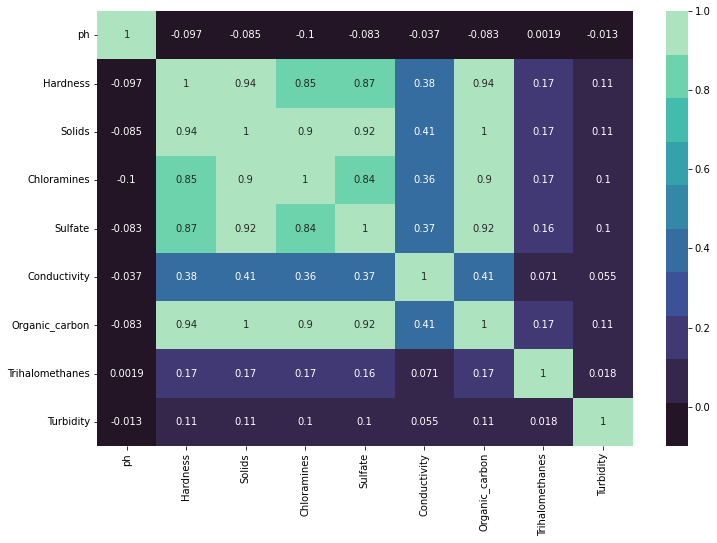

In [6]:
colors= sns.color_palette("mako", 10)
plt.figure(figsize=(12,8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap=colors)

In [12]:
def pred(par):
    cond = [ph,hard,tds, chlr, slft, cdty, crbn, thts, tbty]
    
    vals = []
    for i in range(len(par)):
        vals += [cond[i](par[i])]
    print(vals)
    ans = NB.predict([vals])
    
    if(ans == 1):
        p = 'Potable'
    else:
        p = 'Not Potable'
    
    new_row = {'ph':par[0],'Hardness':par[1],'Solids':par[2],'Chloramines':par[3],'Sulfate':par[4],'Conductivity':par[5],'Organic_carbon':par[6],'Trihalomethanes':par[7],'Turbidity':par[8],'Prediction':p}
    
    '''df = pd.read_csv('trial_logs.csv')
    df = df.append(par, ignore_index=True)
    df.to_csv('trial_logs.csv')
'''
    return p

print(pred([4,0,0,0,0,0,0,0,1]))

[0, 0, 0, 0, 0, 0, 0, 0, 0]
Potable
